# Life Expectancy By Country
Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.

## Accesing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("country_data.csv")
print(data.head())

               Country  Life Expectancy          GDP
0          Afghanistan         58.19375   340.015425
1              Albania         75.15625  2119.726679
2              Algeria         73.61875  2847.853392
3               Angola         49.01875  1975.143045
4  Antigua and Barbuda         75.05625  9759.305728


In [4]:
print(data.dtypes)

Country             object
Life Expectancy    float64
GDP                float64
dtype: object


Let's isolate the column with the life expectancy data

In [5]:
life_expectancy = data["Life Expectancy"]

## Find the Quartiles 


We can now use NumPy functions on that column! Let’s use the np.quantile() function to find the quartiles of life_expectancy. Store the result in a variable named life_expectancy_quartiles and print the results.

In [6]:
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


By looking at those three values we can get a sense of the spread of the data. For example, it seems like some of the data is fairly close together — a quarter of the data is between 72.5 years and 75.4 years. Could we predict what the histogram might look like from those three number? Let's find out!

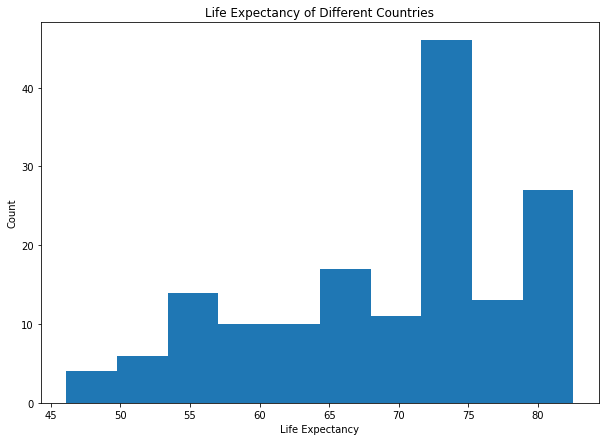

In [21]:
plt.figure(figsize=(10,7))
plt.hist(life_expectancy)
plt.title('Life Expectancy of Different Countries')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.show()

## Splitting the Data by GDP

GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value.

Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for “low GDP countries” and “high GDP countries.

To start, let’s isolate the GDP column and store it in a variable named gdp. This should be similar to how you isolated the life expectancy column.

In [10]:
gdp = data["GDP"]

We now want to find the median GDP. We can use NumPy’s np.median() function, but since the median is also a quantile, we can call np.quanitle() using 0.5 as the second parameter

In [11]:
median_gdp = np.quantile(gdp, 0.5)
print(median_gdp)

2938.0781152500003


Now let's divide our data rows between "Low GDP" & "high GDP" using our GDP median 

In [12]:
low_gdp = data[data["GDP"] <= median_gdp]
high_gdp = data[data["GDP"] > median_gdp]

Now that we’ve split the data based on the GDP, let’s see how the life expectancy of each group compares to each other.

In [13]:
low_gdp_quartiles = np.quantile(low_gdp["Life Expectancy"], [0.25, 0.5, 0.75])
high_gdp_quartiles = np.quantile(high_gdp["Life Expectancy"], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)
print(high_gdp_quartiles)

[56.3375  64.34375 71.7375 ]
[72.965625 75.15625  80.521875]


## Low & High GDP Histogram Comparison

By looking at the quantiles, we should get a sense of the spread and central tendency of these two datasets. But let’s plot a histogram of each dataset to really compare them.

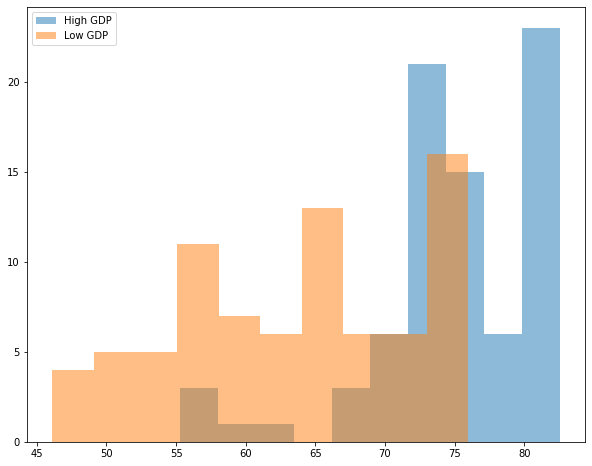

In [18]:
plt.clf()
plt.figure(figsize=(10,8))
plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.legend()
plt.show()

We can see now how different are life expectancies between countries with a Low GDP and a High GDP 